Problem 7.1:

Solve the linear system Ax = b for x where
$$
A = \begin{pmatrix} -1 & 2 & 3 \\ 4 & -5 & 6 \\ 7 & 8 & -9 \end{pmatrix}
$$

$$
b = (12.9, -5.1, 10.7)^T
$$

In [26]:
import numpy as np

A = np.array([[-1, 2, 3],
              [4, -5, 6],
              [7, 8, -9]])

b = np.array([12.9, -5.1, 10.7])

x = np.linalg.solve(A,b)

print (x)

[0.1 3.5 2. ]


Problem 7.2:

Consider the n by n matrix defined by
$$
A = \begin{pmatrix} 1 & 1/2 & 1/3 & ... & 1/n \\ 1/2 & 1/3 & 1/4 & ... & 1/(n+1) \\ ... \\ 1/n & 1/(n+1) & 1/(n+2) & ... & 1/(2n-1) \end{pmatrix}
$$
and the vector
$$
b = (1, -1, 1, -1, ...)^T
$$
Write a function to generate A and b as a function of n. Use Gaussian elimination to solve the system Ax = b for n = 2,4,8,16. What do you notice about your answers? Are the answers that you get from Gaussian elimination correct?

In [49]:
import numpy as np

def A_matrix(n):
    return np.array([[1 / (i + j - 1) for j in range (1, n + 1)] for i in range(1, n + 1)])

def b_vector(n):
 return np.array([(-1)**(i) for i in range(n)])    

def GaussElim(A,b):
    N = len(b)
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[:,0:N] = A
    aug_matrix[:,N] = b

    for column in range(N):
        for row in range(column+1,N):
            factor = aug_matrix[row, column] / aug_matrix [column, column]
            aug_matrix[row, column:N +1] -= factor * aug_matrix[column, column: N+1]

    return aug_matrix

def BackSub(aug_matrix):
    N = aug_matrix.shape[0]
    x = np.zeros(N)
    [Nrow, Ncol] = aug_matrix.shape
    
    for row in range(N-1,-1,-1):
        RHS = aug_matrix[row,N]
        for column in range(row+1,N):
            RHS -= x[column]*aug_matrix[row,column]
        x[row] = RHS/aug_matrix[row,row]

    return x


for n in [2,4,8,16]:
    print (f"\nSolving for n = {n}")
    A = A_matrix(n)
    b = b_vector(n)

    aug = GaussElim(A.copy(), b.copy())
    x = BackSub(aug)
    
    res = np.linalg.norm(A @ x - b)
    print (f"Solution x: \n{x}")
    print (f"Residual: {res:.2e}\n")


""" After running the code, what I noticed about my answers was that the higher the value for n gets the greater the residual becomes. While n = [2,4] is fairly accurate, n = 8 becomes more innacurate, with n = 16 being much more innacurate. This is most likely due to the fact that this matrix divides by increasingly smaller numbers, making it ill-conditioned. Without methods such as round off and pivoting, the error in these calculations grow exponentially. """


Solving for n = 2
Solution x: 
[ 10. -18.]
Residual: 0.00e+00


Solving for n = 4
Solution x: 
[  516. -5700. 13620. -8820.]
Residual: 2.54e-13


Solving for n = 8
Solution x: 
[ 8.68360019e+05 -4.63836249e+07  6.04807570e+08 -3.27135737e+09
  8.80667183e+09 -1.24630507e+10  8.87175098e+09 -2.50393574e+09]
Residual: 2.38e-07


Solving for n = 16
Solution x: 
[-1.59124643e+10  2.43754494e+12 -9.21464089e+13  1.49764646e+15
 -1.29433071e+16  6.57573652e+16 -2.04856236e+17  3.90673159e+17
 -4.40045018e+17  3.35726795e+17 -5.32409878e+17  1.28587009e+18
 -1.86270375e+18  1.49902253e+18 -6.39096827e+17  1.13597169e+17]
Residual: 5.91e+01



' After running the code, what I noticed about my answers was that the higher the value for n gets the greater the residual becomes. While n = [2,4] is fairly accurate, n = 8 becomes more innacurate, with n = 16 being much more innacurate. This is most likely due to the fact that this matrix divides by increasingly smaller numbers, making it ill-conditioned. Without methods such as round off and pivoting, the error in these calculations grow exponentially. '

Chapter 7, Programing Project 1: Xenon Poisoning

135Xe is produced in a nuclear reactor through two mechanisms:
• The production of 135Te from fission, which then decays to 135I via β decay with a half-life
of 19 s, which then decays to 135Xe via β decay with a half-life of 6.6 h.
• The production of 135Xe directly from fission.
135Xe is important because it has a very large capture cross-section of 2.6 × 10 6 barns. 135Xe is also radioactive, and decays with a half-life of 9.1 h. For a reactor with an average scalar flux, φ in units [neutrons/cm2/s], the equations for the production of 135Xe are (using the abbreviation number density [nuclei/cm3] of 135Xe→ X, 135I→ I , 135Te→ T ), 
d/dt T = γ_T Σfφ − λ_T T ,
d/dt I = λ_T T − λ_I I,
d/dt X = λ_I I + γ_X Σfφ − (λ_X + σ_Xa φ)X.
If we consider the steady-state limit, i.e., d/dt = 0, we have an equation for the equilibrium concentration of all three nuclides. For a 235U fueled reactor, the fission yields for Te and Xe are γ T = 0.061, γ X = 0.003, and the macroscopic fission cross-section is Σf = 0.07136 cm−1. Compute the equilibrium concentrations of these three nuclides at power densities of 5, 50, and 100 W/cm3 , using the energy per fission of 200 MeV/fission. Also, compute the absorption rate density of neutrons in 135Xe, given by σ X
a φX.

In [52]:
import numpy as np

#Constants
gamma_T = 0.061
gamma_X = 0.003
sigma_f = 0.07136 #1/cm
sigma_a_X = 2.6e-18 #cm^2 (Barns to cm^2)
Ef = 3.2e-11 #J/fission (MeV to joules)

#Decay Constants (1/hr)
lambda_T = np.log(2) / 19
lambda_I = np.log(2) / 6.6
lambda_X = np.log(2) / 9.1

power_densities = [5,50,100] #W/cm^3

#Loop through power densities
for P in power_densities:
    phi = P / (Ef * sigma_f) #Scalar flux relationship

    #Rearanged matrix A and vector b at steady state (d/dt = 0)
    A = np.array([
        [-lambda_T, 0 , 0],
        [lambda_T, -lambda_I, 0],
        [0, lambda_I, -(lambda_X + sigma_a_X * phi)]
    ])

    b = np.array([
        -gamma_T * sigma_f * phi, 0, -gamma_X * sigma_f * phi
    ])

    T, I, X = np.linalg.solve(A, b)

    abs_rate = sigma_a_X * phi * X

    print(f"Concentrations in steady state mode at power density: {P} W/cm^3\n")
    print(f"Te-135 = {T:.4e} nuclei/cm^3")
    print(f"I-135 = {I:.4e} nuclei/cm^3")
    print(f"X-135 = {X:.4e} nuclei/cm^3\n")
    print(f"Absorption rate density of neutrons in Xe-135 at power density {P} W/cm^3: {abs_rate:.4e} reactions/cm^3-s\n")

Concentrations in steady state mode at power density: 5 W/cm^3

Te-135 = 2.6126e+11 nuclei/cm^3
I-135 = 9.0755e+10 nuclei/cm^3
X-135 = 1.3128e+11 nuclei/cm^3

Absorption rate density of neutrons in Xe-135 at power density 5 W/cm^3: 7.4735e+05 reactions/cm^3-s

Concentrations in steady state mode at power density: 50 W/cm^3

Te-135 = 2.6126e+12 nuclei/cm^3
I-135 = 9.0755e+11 nuclei/cm^3
X-135 = 1.3119e+12 nuclei/cm^3

Absorption rate density of neutrons in Xe-135 at power density 50 W/cm^3: 7.4684e+07 reactions/cm^3-s

Concentrations in steady state mode at power density: 100 W/cm^3

Te-135 = 5.2253e+12 nuclei/cm^3
I-135 = 1.8151e+12 nuclei/cm^3
X-135 = 2.6218e+12 nuclei/cm^3

Absorption rate density of neutrons in Xe-135 at power density 100 W/cm^3: 2.9851e+08 reactions/cm^3-s



Problem 9.1:

Write a Python function called isSymetric which takes a single parameter A and checks if the NumPy matrix A is symmetric. It should return 1 if the matrix is symmetric, and 0 if the matrix is non-symmetric.

In [35]:
import numpy as np

def isSymmetric(A):
    if np.array_equal(A, A.T):
        return 1
    else:
        return 0

#Examples
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(isSymmetric(A))

A = np.array([[1, 1, 1],
              [1, 2, 2],
              [1, 2, 3]])

print(isSymmetric(A))

0
1


Problem 9.2:

Write a Python function called isDiagonallyDominant which takes a single parameter A and check if the NumPy matrix A is diagonally dominant. It should return 1 if the matrix is diagonally dominant, and 0 if the matrix is not diagonally dominant.

In [38]:
import numpy as np

def isDiagonallyDominant(A):
    abs_diagonal = np.abs(A.diagonal())
    row_sums = np.sum(np.abs(A), axis = 1) - abs_diagonal

    if np.all(abs_diagonal >= row_sums):
        return 1
    else:
        return 0

#Examples
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(isDiagonallyDominant(A))

A = np.array([[3, 1, 1],
              [1, 3, 2],
              [1, 2, 3]])

print(isDiagonallyDominant(A))

0
1


Chapter 9, Programming Project 2: Tri-diagonal Gauss-Seidel

Write a Gauss-Seidel solver for tri-diagonal matrices. The implementation should take as input a tri-diagonal matrix just as the tri-diagonal Jacobi defined previously. Test your implementations on the same timing study performed above in section 9.6. Comment on the results.

Our matrix is
 [[ 0.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5 -1. ]
 [-1.   2.5  0. ]]
x_0 = [0.99853392 1.4963368  1.74231023 1.85944077 1.90629336 1.90629392
 1.85944234 1.7423125  1.49633922 0.99853569]; number of iterations: 26


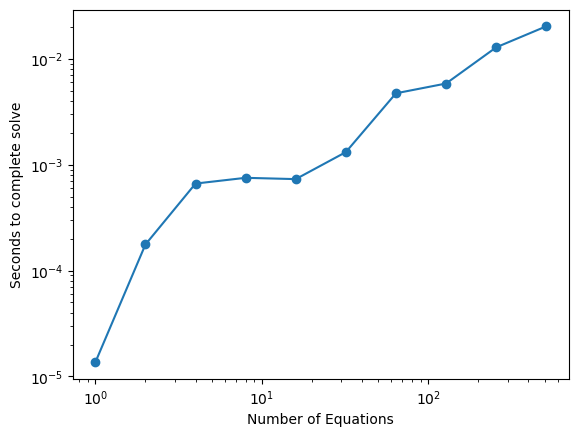

Approximate growth rate is n^
 0.6599671242904567


'When comparing timing tests between the Gauss Seidel method and the Jacobi method, the GS method completes the solve faster. This is because the Gauss Seidel method uses the most up to date information when performing an iteration. This will cause fewer iterations than the Jacobi method, resulting in faster computation.'

In [45]:
import numpy as np
import time
import matplotlib.pyplot as plt

def gauss_seidel_tri_diagonal(A, b, x=None, tol = 1.0e-6, max_iterations = 1000, verbose = True):
    N = len(b)

    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        raise ValueError("Must be numpy arrays")

    elif A.shape[0] != len(b):
        raise ValueError("Dimensions don't match")

    if N == 1:
        x_0 = np.array([b[0] / A[0, 1]])

        return x_0, 0

    else:
        if x is None:
            x = np.random.rand(N)

    x_0 = x.copy()
    for iteration in range(1, max_iterations +1):
        x_old = x_0.copy()
        for i in range (N):
            if i == 0:
                x_0[i] = (b[i] - A[i, 2] * x_0[i + 1]) / A[i, 1]

            elif i == N - 1:
                x_0[i] = (b[i] - A[i, 0] * x_0[i - 1]) / A[i, 1]

            else:
                x_0[i] = (b[i] - A[i,0] * x_0[i - 1] - A[i, 2] * x_0[i + 1]) / A[i, 1]

        change = np.linalg.norm(x_0 - x_old) / np.linalg.norm(x_0)

        if change < tol:
            if verbose:
                print(f"x_0 = {x_0}; number of iterations: {iteration}")
            return x_0, iteration
            
    print("Iteration did not converge within tolerance and iterations")

    return x_0, iteration


#Small system test

N = 10
A_tri = np.zeros((N,3))
b = np.ones(N)
#same structure as before
#but fill it more easily
A_tri[:,1] = 2.5 #middle column is diagonal
A_tri[:,0] = -1.0 #left column is left of diagonal
A_tri[:,2] = -1.0 #right column is right of diagonal
A_tri[0,0] = 0 #remove left column in first row
A_tri[N-1,2] = 0 #remove right column in last row
print("Our matrix is\n",A_tri)

gauss_seidel_tri_diagonal(A_tri, b)

#Timing test
num_tests = 10
I = 2**np.arange(num_tests)
times = np.zeros(num_tests)

for test in range(num_tests):
    N = I[test]
    b = np.ones(N)
    A_tri = np.zeros((N,3))
    #same structure as before
    #but fill it more easily
    A_tri[:,1] = 2.5 #middle column is diagonal
    A_tri[:,0] = -1.0 #left column is left of diagonal
    A_tri[:,2] = -1.0 #right column is right of diagonal
    A_tri[0,0] = 0 #remove left column in first row
    A_tri[N-1,2] = 0 #remove right column in last row
    
    start = time.perf_counter()
    x, _ = gauss_seidel_tri_diagonal(A_tri, b, verbose = False)
    end = time.perf_counter()
    times[test] = end-start

plt.loglog(I,times,'o-')
plt.xlabel("Number of Equations")
plt.ylabel("Seconds to complete solve")
plt.show()

print("Approximate growth rate is n^\n",
    (np.log(times[-1])-np.log(times[-2])) /
    (np.log(I[-1])-np.log(I[-2])))

"""When comparing timing tests between the Gauss Seidel method and the Jacobi method, the GS method completes the solve faster. This is because the Gauss Seidel method uses the most up to date information when performing an iteration. This will cause fewer iterations than the Jacobi method, resulting in faster computation."""